## Potential Talents Search - Candidates Ranking
As a talent sourcing and management company, we are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this requires understanding the client’s needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third, where to find talented individuals is another challenge.

The nature of our job requires a lot of human labor and is full of manual operations. Towards automating this process we want to build a better approach that could save us time and finally help us spot potential candidates that could fit the roles we are in search for. Moreover, going beyond that for a specific role we want to fill in we are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness.

We are right now semi-automatically sourcing a few candidates, therefore the sourcing part is not a concern at this time but we expect to first determine best matching candidates based on how fit these candidates are for a given role. We generally make these searches based on some keywords such as “full-stack software engineer”, “engineering manager” or “aspiring human resources” based on the role we are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you.

Assuming that we were able to list and rank fitting candidates, we then employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually and at the end of this manual review, we might choose not the first fitting candidate in the list but maybe the 7th candidate in the list. If that happens, we are interested in being able to re-rank the previous list based on this information. This supervisory signal is going to be supplied by starring the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, we expect the list to be re-ranked each time a candidate is starred.

### Data Description:

The data comes from our sourcing efforts. We removed any field that could directly reveal personal details and gave a unique identifier for each candidate.

**Attributes:**
- id : unique identifier for candidate (numeric)
- job_title : job title for candidate (text)
- location : geographical location for candidate (text)
- connections: number of connections candidate has, 500+ means over 500 (text)

### Output (desired target):
fit - how fit the candidate is for the role? (numeric, probability between 0-1)

***Keywords:*** “Aspiring human resources” or “seeking human resources”


### Goal:
Predict how fit the candidate is based on their available information (variable fit)

### Success Metrics:
- Rank candidates based on a fitness score.
- Re-rank candidates when a candidate is starred.

### Bonuses:
- We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action.
- How can we filter out candidates which in the first place should not be in this list?
- Can we determine a cut-off point that would work for other roles without losing high potential candidates?
- Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias?

### Importing Libraries

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
# Load dataset
df = pd.read_csv('datasets/potential_talents.csv', index_col = 'id')

# Inspect data
df.head(10)

,job_title,location,connection,fit
id,,,,
1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN
7,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
8,HR Senior Specialist,San Francisco Bay Area,500+,NaN
9,Student at Humber College and Aspiring Human R...,Kanada,61,NaN


In [3]:
df.connection.unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

<AxesSubplot:xlabel='connection', ylabel='Count'>

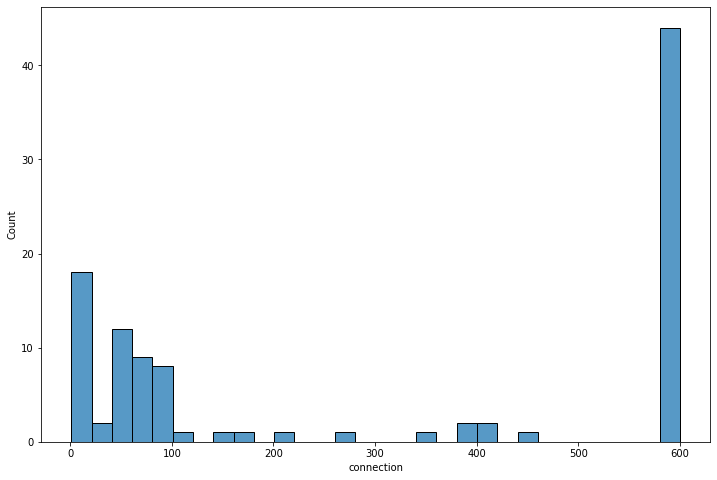

In [4]:
plt.figure(figsize = [12,8])
sns.histplot(df.connection.replace({'500+ ':'600'}).apply(int), bins = 30)

In [5]:
# df[df.location.str.contains("California")].location.unique()

In [6]:
df.shape

(104, 4)

In [7]:
df.drop_duplicates()
df.shape

(104, 4)

# Work with text

In [8]:
def read_glove(glove_file):
    with open(glove_file, "r") as f:
        words_vector_map = {}
        
        for line in f:
            line = line.strip().split()
            words_vector_map[line[0]] = np.array(line[1:], dtype = np.float64)
    return(words_vector_map)

In [9]:
words_vector_map = read_glove("utils/glove.6B.50d.txt")

In [10]:
df["job_title_cleaned"] = df["job_title"].str.replace("[+*,.|()${}&\-'!]", " ", regex = True)

In [11]:
# Gather all words used in job titles for review
set(df["job_title_cleaned"].str.split().agg(sum, axis = 0))

{'2019',
 '2020',
 '2621',
 '408',
 '709',
 'Administration',
 'Administrative',
 'Admissions',
 'Advisory',
 'Always',
 'America',
 'An',
 'Analyst',
 'Analytics',
 'Army',
 'Arts',
 'Aspiring',
 'Assistant',
 'Atlanta',
 'Bachelor',
 'Bauer',
 'Bayar',
 'Benefits',
 'Beneteau',
 'Biology',
 'Board',
 'Brand',
 'Buckhead',
 'Business',
 'C',
 'CHRO',
 'CSR',
 'Care',
 'Celal',
 'Chapman',
 'College',
 'Communications',
 'Community',
 'Compensation',
 'Conflict',
 'Coordinator',
 'Cum',
 'Customer',
 'Delphi',
 'Development',
 'Director',
 'ENGIE',
 'EPIK',
 'EY',
 'Endemol',
 'Energy',
 'Engineer',
 'English',
 'Entry',
 'Environmental',
 'Excellence',
 'Executive',
 'Experienced',
 'Focused',
 'GIS',
 'GPHR',
 'Generalist',
 'Graduate',
 'Graduating',
 'Groupe',
 'Guard',
 'HR',
 'HRIS',
 'Hardware',
 'Heil',
 'Houston',
 'Human',
 'Humber',
 'Illinois',
 'Inc',
 'Indiana',
 'Information',
 'Intelligence',
 'InterContinental',
 'International',
 'JTI',
 'Japan',
 'Junior',
 'Kokomo',

There are some abbreviations that might mean something important like:
* CHRO
* GPHR
* HR
* HRIS

As I am familiar only with abbreviation of HR - human resources, and it is very important feature, I replace this abbreviation to proper value

In [12]:
df["job_title_cleaned"] = df["job_title_cleaned"].str.replace("HR ", " human resources ")
df["job_title_cleaned"] = df["job_title_cleaned"].str.replace(" HR ", " human resources ")

In [13]:
def sentence_to_avg(sentence, words_vector_map):
    shp = words_vector_map[list(words_vector_map.keys())[0]].shape
    aver = np.zeros(shp) 
    
    sentence = sentence.strip().lower().split()
    count = 0
    for word in sentence:
        if word in words_vector_map:
            aver += words_vector_map[word]
            count += 1
    
    return(aver/count)

In [14]:
# content = sentence_to_avg(df.loc[1,"job_title_cleaned"], words_vector_map)

In [15]:
def cos_similarity(u, v):
    dp = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    
    if np.isclose(norm_u * norm_v, 0, atol=1e-32):
        return 0
    
    cos_similarity = dp / (norm_u * norm_v)
    
    return(cos_similarity)

In [16]:
def calculate_sim(sentence):
    aver = sentence_to_avg(sentence, words_vector_map)
    similarity = cos_similarity(aver, target)
    return(similarity)

In [17]:
target_keyword = "Aspiring human resources"
target = sentence_to_avg(target_keyword, words_vector_map)
df["similarity_1"] = df["job_title_cleaned"].apply(calculate_sim)

In [18]:
target_keyword = "seeking human resources"
target = sentence_to_avg(target_keyword, words_vector_map)
df["similarity_2"] = df["job_title_cleaned"].apply(calculate_sim)

In [19]:
df.head()

,job_title,location,connection,fit,job_title_cleaned,similarity_1,similarity_2
id,,,,,,,
1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C T Bauer College of Business Graduate ...,0.691783,0.655285
2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,Native English Teacher at EPIK English Progra...,0.616477,0.613949
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional,0.958368,0.869331
4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,People Development Coordinator at Ryan,0.693890,0.720696
5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar University,0.496264,0.527763


In [20]:
df[(df['similarity_1']>0.75) & (df['similarity_2']>0.75)].head()

,job_title,location,connection,fit,job_title_cleaned,similarity_1,similarity_2
id,,,,,,,
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional,0.958368,0.869331
6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658
7,Student at Humber College and Aspiring Human R...,Kanada,61,NaN,Student at Humber College and Aspiring Human R...,0.809403,0.765743
8,HR Senior Specialist,San Francisco Bay Area,500+,NaN,human resources Senior Specialist,0.884097,0.890835
9,Student at Humber College and Aspiring Human R...,Kanada,61,NaN,Student at Humber College and Aspiring Human R...,0.809403,0.765743


In [21]:
df["similarity"] = df["similarity_1"] * df["similarity_2"]
df["rank"] = df["similarity"].rank(ascending = False)
df.sort_values(by = "rank", inplace = True)
df.head(10)

,job_title,location,connection,fit,job_title_cleaned,similarity_1,similarity_2,similarity,rank
id,,,,,,,,,
28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,Seeking Human Resources Opportunities,0.922567,0.980290,0.904384,1.5
30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,NaN,Seeking Human Resources Opportunities,0.922567,0.980290,0.904384,1.5
60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658,0.870621,5.0
49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658,0.870621,5.0
6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658,0.870621,5.0
24,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658,0.870621,5.0
36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,Aspiring Human Resources Specialist,0.968802,0.898658,0.870621,5.0
73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,NaN,Aspiring Human Resources Manager seeking inte...,0.922214,0.942245,0.868951,8.0
74,Human Resources Professional,Greater Boston Area,16,NaN,Human Resources Professional,0.936910,0.922303,0.864115,9.0


In [22]:
df.tail(10)

,job_title,location,connection,fit,job_title_cleaned,similarity_1,similarity_2,similarity,rank
id,,,,,,,,,
98,Student,"Houston, Texas Area",4,NaN,Student,0.604048,0.528020,0.318949,95.0
95,Student at Westfield State University,"Bridgewater, Massachusetts",57,NaN,Student at Westfield State University,0.520403,0.551546,0.287026,96.0
5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar University,0.496264,0.527763,0.261910,98.5
23,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar University,0.496264,0.527763,0.261910,98.5
35,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar University,0.496264,0.527763,0.261910,98.5
48,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar University,0.496264,0.527763,0.261910,98.5
41,Student at Chapman University,"Lake Forest, California",2,NaN,Student at Chapman University,0.517071,0.497381,0.257181,102.5
63,Student at Chapman University,"Lake Forest, California",2,NaN,Student at Chapman University,0.517071,0.497381,0.257181,102.5
54,Student at Chapman University,"Lake Forest, California",2,NaN,Student at Chapman University,0.517071,0.497381,0.257181,102.5


* Use one target keyword in place of two 
* I have cases when "human resources" is shortened as "HR". I should replace  these cases into human resources.

In [23]:
df.shape

(104, 9)